In [ ]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path = "/gdrive/My Drive/ML:March2020/Assignments/data/"
data = pd.read_csv(path+"titanic_train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
data.shape

(891, 12)

In [ ]:
data['Survived'].unique()

array([0, 1])

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Label Encoding and removing Nan variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
data['Sex']=Encoder.fit_transform(data['Sex'])
data['Name']=Encoder.fit_transform(data['Name'])
data['Ticket']=Encoder.fit_transform(data['Ticket'])
data["Embarked"].replace({"S": "0","C":"1","Q":"2"}, inplace=True)
#removing Nan/Null data in the dataset 
data.dropna(subset = ['Embarked'], inplace=True)
data.dropna(subset = ['Age'], inplace=True)
data.dropna(subset = ['Fare'], inplace=True)
data=data.drop('Cabin', axis=1) #removing Cabin as it contains most number od Nan data
data.head(65)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,0
1,2,1,1,190,0,38.0,1,0,596,71.2833,1
2,3,1,3,353,0,26.0,0,0,669,7.9250,0
3,4,1,1,272,0,35.0,1,0,49,53.1000,0
4,5,0,3,15,1,35.0,0,0,472,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
80,81,0,3,842,1,22.0,0,0,304,9.0000,0
81,82,1,3,737,1,29.0,0,0,311,9.5000,0
83,84,0,1,141,1,28.0,0,0,25,47.1000,0
84,85,1,2,386,0,17.0,0,0,637,10.5000,0


In [ ]:
#Creating x and y inorder to perform test,train split
y=data['Survived']
x=data.drop('Survived',axis=1)
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,108,1,22.0,1,0,523,7.2500,0
1,2,1,190,0,38.0,1,0,596,71.2833,1
2,3,3,353,0,26.0,0,0,669,7.9250,0
3,4,1,272,0,35.0,1,0,49,53.1000,0
4,5,3,15,1,35.0,0,0,472,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
885,886,3,684,0,39.0,0,5,480,29.1250,2
886,887,2,548,1,27.0,0,0,101,13.0000,0
887,888,1,303,0,19.0,0,0,14,30.0000,0
889,890,1,81,1,26.0,0,0,8,30.0000,1


In [ ]:
# Splitting the data to perform Logistic Regression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2) #splitting the data in train:test::75:25 ratio
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((534, 10), (178, 10), (534,), (178,))

**Logistic regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

score = model.score(x_train, y_train)
print('Train F1 Score = {} %'.format(round(score,4)*100))
score = model.score(x_test, y_test)
print('Test F1 Score = {} %'.format(round(score,4)*100))

Train F1 Score = 78.84 %
Test F1 Score = 73.03 %


**Logistic regression between Age and survived**

In [ ]:
X_age = pd.get_dummies(data['Age']).values
model.fit(X_age, y)
y_predict = model.predict(X_age)
y_predict[:10]
(y == y_predict).mean()

0.6615168539325843

**Logistic regression between Sex and survived**

In [ ]:
X_Sex = pd.get_dummies(data['Sex']).values
model.fit(X_Sex, y)
y_predict = model.predict(X_Sex)
y_predict[:10]
(y == y_predict).mean()

0.7794943820224719

**Logistic regression between fare and survived**

In [ ]:
X_pclass = pd.get_dummies(data['Fare']).values
model.fit(X_pclass, y)
y_predict = model.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()

0.800561797752809

**Logistic regression between Pclass and survived**

In [ ]:
X_pclass = pd.get_dummies(data['Pclass']).values
model.fit(X_pclass, y)
y_predict = model.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()

0.6741573033707865

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,test_pred))
print(classification_report(y_test,test_pred))

[[87 23]
 [25 43]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       110
           1       0.65      0.63      0.64        68

    accuracy                           0.73       178
   macro avg       0.71      0.71      0.71       178
weighted avg       0.73      0.73      0.73       178



**KNN model**

In [ ]:
Y_train = y_train.ravel()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm = 'brute',n_neighbors=6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90 20]
 [37 31]]
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       110
           1       0.61      0.46      0.52        68

    accuracy                           0.68       178
   macro avg       0.66      0.64      0.64       178
weighted avg       0.67      0.68      0.67       178



In [ ]:
error = []
y_train = y_train.ravel()
# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(algorithm = 'brute',n_neighbors=i)
    print('K value ={}'.format(i))

    knn.fit(x_train, y_train)

    pred_i = knn.predict(x_test)

    print(classification_report(y_test, pred_i))

    correct =[1 if a==b else 0 for (a,b) in zip(y_pred, y_test)]
    accuracy = np.sum(correct)/len(correct)
    error.append(100-(accuracy*100))


# Best K value is 8

K value =1
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       110
           1       0.48      0.49      0.48        68

    accuracy                           0.60       178
   macro avg       0.58      0.58      0.58       178
weighted avg       0.60      0.60      0.60       178

K value =2
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       110
           1       0.51      0.29      0.37        68

    accuracy                           0.62       178
   macro avg       0.58      0.56      0.55       178
weighted avg       0.60      0.62      0.59       178

K value =3
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       110
           1       0.49      0.51      0.50        68

    accuracy                           0.61       178
   macro avg       0.59      0.59      0.59       178
weighted avg       0.61      0.61      0.

**Linear model**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
train_pred = model.predict(x_train)

test_pred = model.predict(x_test)

score = model.score(x_train, y_train)
print('Train F1 Score = {} %'.format(round(score,4)*100))
score = model.score(x_test, y_test)
print('Test F1 Score = {} %'.format(round(score,4)*100))

Train F1 Score = 41.78 %
Test F1 Score = 34.239999999999995 %


In [ ]:
val=list(np.arange(0.5,12,0.001))
from sklearn.linear_model import  Ridge
model=Ridge()
from sklearn.model_selection import GridSearchCV
parameters={'alpha':val}#rigid
clf=GridSearchCV(model,parameters,n_jobs=-2)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-2,
             param_grid={'alpha': [0.5, 0.501, 0.502, 0.503, 0.504, 0.505,
                                   0.506, 0.507, 0.508, 0.509, 0.51, 0.511,
                                   0.512, 0.513, 0.514, 0.515, 0.516, 0.517,
                                   0.518, 0.519, 0.52, 0.521, 0.522, 0.523,
                                   0.524, 0.525, 0.526, 0.527, 0.528, 0.529, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(clf.best_score_)

0.3849471312505936


In [ ]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, train_pred)
print('train r2 = {}'.format(train_r2))

test_r2 = r2_score(y_test, test_pred)
print('test r2 = {}'.format(test_r2))

train r2 = 0.4178055893155448
test r2 = 0.34242096435363023


**Count of Passengers according to survived**

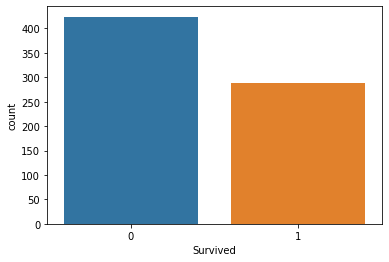

In [ ]:
sns.countplot('Survived',data=data)

**Count of passengers according to Pclass**

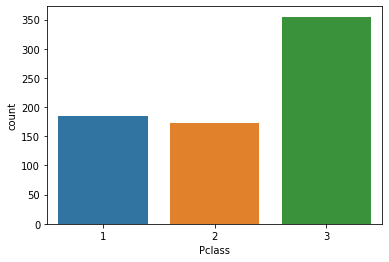

In [ ]:
sns.countplot('Pclass',data=data)

**Count of passengers according to Sex**

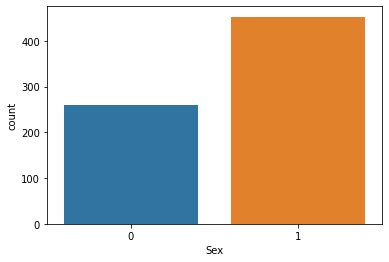

In [ ]:
sns.countplot('Sex',data=data)

**Count of passengers according to Sibsp**

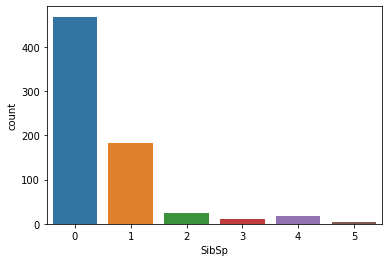

In [ ]:
sns.countplot('SibSp',data=data)

**Count of passengers according to Parch**

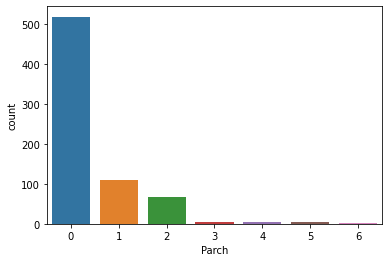

In [ ]:
sns.countplot('Parch',data=data)

**Count of passengers according to Embarked**

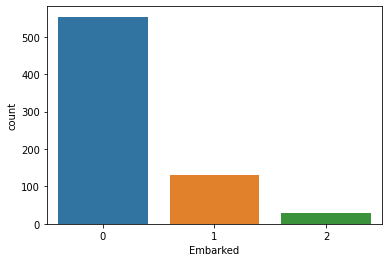

In [ ]:
sns.countplot('Embarked',data=data)

**Distance plot of fare**

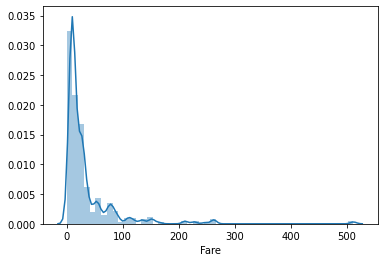

In [ ]:
sns.distplot(data['Fare'], kde=True)

**Distance plot of Age**

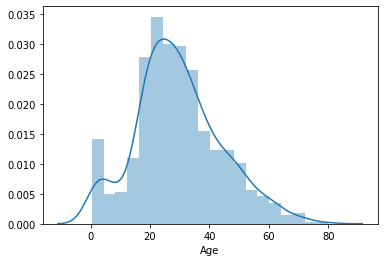

In [ ]:
sns.distplot(data['Age'],kde=True)

**Barplot of survived vs age**

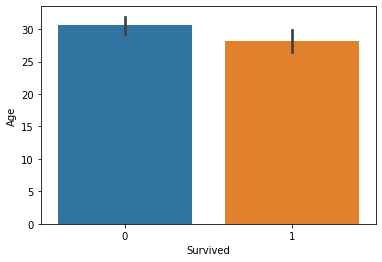

In [ ]:
sns.barplot(x='Survived',y='Age',data=data) 

**Barplot of survived vs sex**

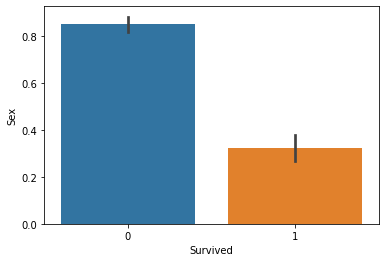

In [ ]:
sns.barplot(x='Survived',y='Sex',data=data) 

**Barplot of survived vs Pclass**

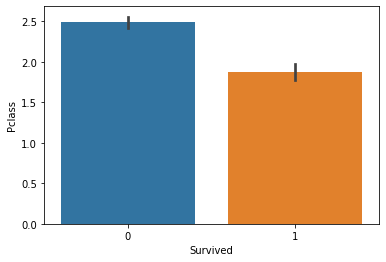

In [ ]:
sns.barplot(x='Survived',y='Pclass',data=data) 

**Catagorical plot of Survived ,age and embarked**

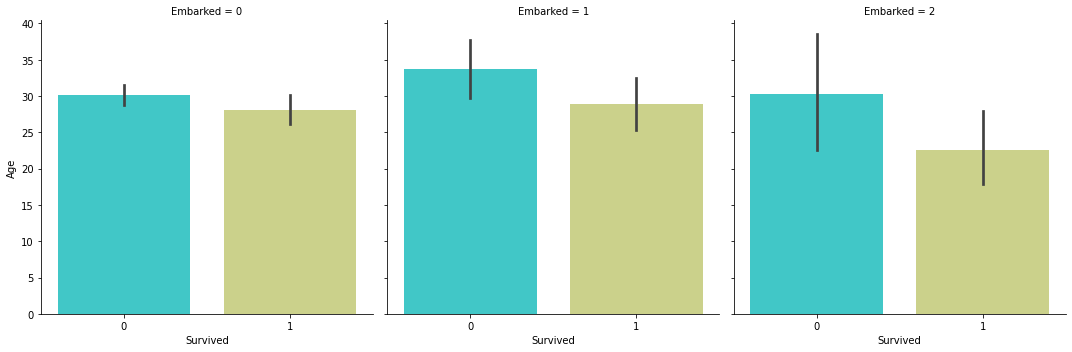

In [ ]:
sns.catplot(x="Survived", y="Age",col="Embarked", kind = 'bar',data=data, palette = "rainbow") 

**Catagorical plot of sex ,age and survived**

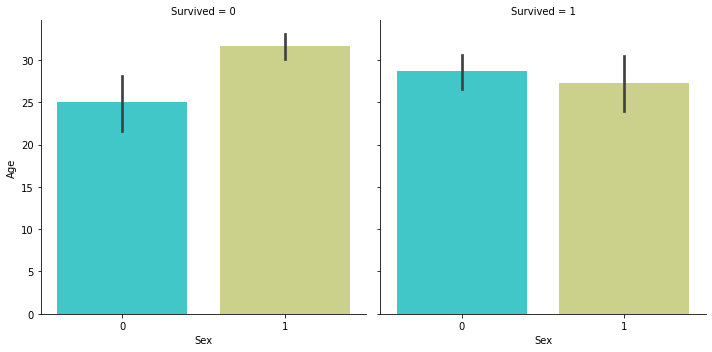

In [ ]:
sns.catplot(x="Sex", y="Age",col="Survived", kind = 'bar',data=data, palette = "rainbow") 

**Catagorical plot of sex ,age and Pclass**

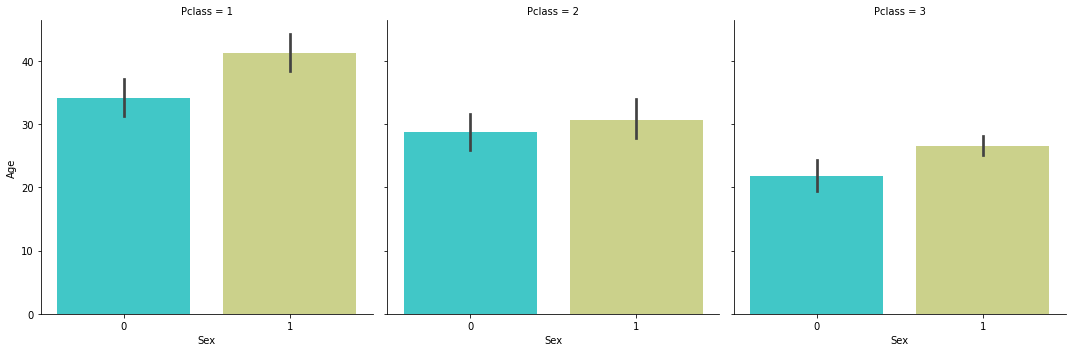

In [ ]:
sns.catplot(x="Sex", y="Age",col="Pclass", kind = 'bar',data=data, palette = "rainbow") 

**Scatter histogram of age vs fare**

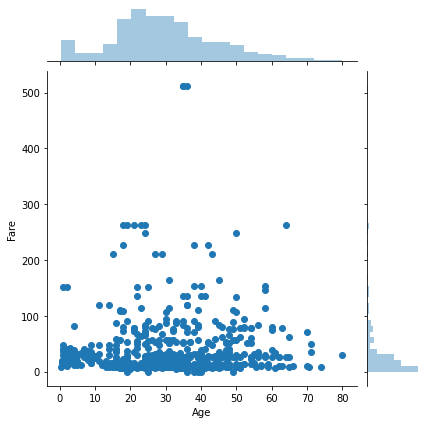

In [ ]:
sns.jointplot(x="Age", y="Fare", data=data)